# Learning from Data: Workshop 6

 | Date set     | Hand-in date |
|:------------------|:-----------------------------------|
|26th February 2016  | **12:00 Friday 11th March 2016** |




An electronic only submission is required.  Please submit your notebook (the .ipynb file) via the  [electronic hand-in system](http://empslocal.ex.ac.uk/submit/).

This workshop is worth 12% of the module mark.


Candidate number: ** 002600**  

In [1]:
%pylab inline
import wget
figsize(8, 8)

Populating the interactive namespace from numpy and matplotlib


## Classification with Support Vector Machines

Support vector machines (SVMs) are popular and powerful classifiers that classify according using a large margin in a high dimensional feature space.   In the following you will use SVMs with both a "linear kernel" and with a RBF kernel.  With a linear kernel the SVM can only separate the data with a straight line or a (hyper)plane, but an RBF kernel is nonlinear and allows it to generate curved decision boundaries.  

We'll use some two-dimensional data, the gmm5 data,  so that we can plot the decision boundaries, etc, and then use one in feature selection. 

### Data

Download and load the data in from two files.  The first file contains 250 data points for training data (and validation), while the second contains 1000 points for testing. There are lots of testing points which will allow you to assess how well a classifier is performing.

In [2]:
try: 
    train = loadtxt('gmm5train.txt')
except FileNotFoundError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/gmm5train.txt')
    train = loadtxt('gmm5train.txt')

try: 
    test = loadtxt('gmm5test.txt')
except FileNotFoundError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/gmm5test.txt')
    test = loadtxt('gmm5test.txt')

# Separate the train and testing data into features (Xtr, Xte) 
# and targets (ttr, tte)
Xtr = train[:,:2]
ttr = train[:,2]
Xte = test[:,:2]
tte = test[:,2]
print(Xtr.shape)

(250, 2)


Plot the data as two classes.  Are these data linearly separable? Why?

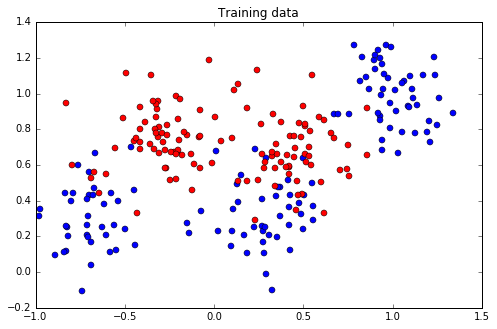

In [3]:
plot(Xtr[ttr==0, 0], Xtr[ttr==0, 1], 'bo')
plot(Xtr[ttr==1, 0], Xtr[ttr==1, 1], 'ro')
axis('scaled')
title('Training data')


><h2> Is the data linearly seperably? </h2> 
><font color = "black" size = "3"> In order for two feature sets to be linearly seperable there must exist at least one line in the plane with all of the blue points on one side of the line and all the red points on the other side. Since this cannot be done in this case, these two classes are not linearly seperable.</font>

### SVM with a linear kernel

We'll use the support vector machines in scikit learn.  Here's an example of training a SVM using a linear kernel (i.e., no non-linearity).  To visualise the result of the classifier, we can classify the result on a grid of points and plot them to show the decision boundary/regions.


Shape of xy is (10000, 2)


(-1.0, 1.5, -0.20000000000000001, 1.3999999999999999)

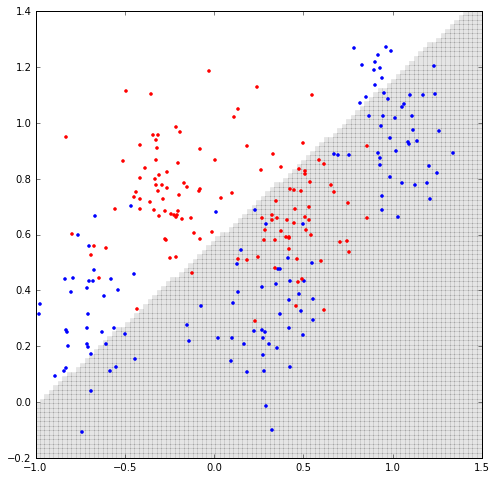

In [4]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')            # SVM with a linear kernel
svm.fit(Xtr, ttr)                     # Train it on the training data

# Plot the predictions (the two classes) for data on a grid and the discriminant 
# function which is the distance from the decision plane
N = 100
M = 100
X = linspace(-1.0, 1.5, N)
Y = linspace(-0.2, 1.4, M)
XX, YY = meshgrid(X, Y)

pred = zeros((M,N))

# The following using meshgrid is a quick way of arranging all the 
# (x, y) grid points in a matrix so that they can be classified in one go. 
xx, yy = np.meshgrid(X, Y)

xy = np.c_[xx.ravel(), yy.ravel()]

xy = vstack((XX.flat, YY.flat)).T
print('Shape of xy is', xy.shape)

pred = svm.predict(xy)
pred = reshape(pred, (M,N))

pcolor(X, Y, pred, cmap=cm.gray, alpha=0.1)
plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'b.')
plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'r.')
axis('tight')



### SVM with an RBF kernel

Now use the SVM with <code>kernel='rbf'</code> to classify the data, but with a non-linear mapping so that the decision boundary can be non-linear. 

In this case the SVM has two additional parameters $C > 0$ and $\gamma$.  $C$ controls how strongly points that lie on the wrong side of the decision boundary are penalised.  When $C$ is large, they are heavily penalised which results in the boundary being flexible, but when it is small they are lightly penalised so the boundary tends to be straighter.  You can set the value of $C$ (and $\gamma$) with

        svm = SVC(kernel='rbf', C=1, gamma=0.1) 

The default value of $C$ is 1 and the default value of $\gamma$ is 0.1.

The $\gamma$ parameter controls the width of the RBF kernel, that is how close training samples must be to interact with each other (recall the effect of the width of basis functions in RBF regression).  When $\gamma$ is large the training samples must be close to interact and the decision boundary tends to be nonlinear, whereas when $\gamma$ is small it tends to be smooth.

Use cross validation on the *training* data to choose the best value of $C$ and $\gamma$.  Try a few values of $C$ and $\gamma$ by hand first of all to find appropriate ranges and it will  be best to vary them on a logrithmic scale (<code>logspace</code> will be helpful here).  You may care to investigate and use the sklearn helper functions for searching a grid of values for the best cross validation value: see <http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#example-svm-plot-rbf-parameters-py> or write your own!

What is the resulting accuracy on the test data and the best decision boundary?

In [5]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split

The optimal parameters are
C: 0.316227766017 
Gamma: 7.74263682681 
Accuracy: 90.0%


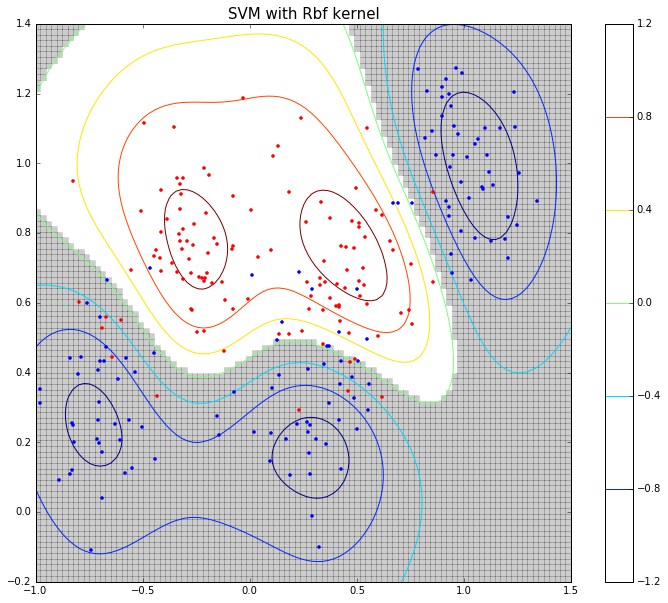

In [8]:
# Here we are perfoming the grid search for the highest accuracy given the parameters gamma and C. 
def optimalPara(Xtr, ttr, C_range, gamma_range):
    param_grid = dict(gamma=gamma_range, C=C_range)
    #Perfoming a strafified shuffel cross-validation.
    cv = StratifiedShuffleSplit(ttr, n_iter=1, test_size=0.2, random_state=5)
    #Using grid search to extract the best values for C and gamma. 
    grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    return grid.fit(Xtr, ttr)
    

# Returns the same accuracy as the scilearn grid search method.
def accuracySVC(Xtr, ttr, Xte, tte, C, gamma):
    n = len(tte)
    svm = SVC(kernel='rbf', C = C, gamma = gamma)
    svm.fit(Xtr, ttr) 
    pred = svm.predict(Xte)
    accur = len(pred[pred == tte])/n
    return accur  
#This function plots the decsion boundaries and discriminants(distance from boundary to point).
def plot_svm_classifier(Xtr, ttr, C, gamma, kernel):
    
    svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(Xtr, ttr)           
    # Resolution of the decision boundaries.
    N = 100
    M = 100
    X = linspace(-1.0, 1.5, N)
    Y = linspace(-0.2, 1.4, M)
    
    bound = empty((M,N), dtype= float)
    y_scores = zeros((M,N), dtype= float)
    for ny, y in enumerate(Y):
        for nx, x in enumerate(X):
            bound[ny, nx] = svm.predict([[x, y]])  
            y_scores[ny, nx] = svm.decision_function([[x, y]])  
    
    figure(figsize =(12, 10))
    pcolor(X, Y, bound, cmap=cm.gray, alpha=0.2)
    contour(X, Y, y_scores) 
    colorbar()
    plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'b.')
    plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'r.')
    axis('tight')

C_range = logspace(-2, 4, 25)
gamma_range = logspace(-3, 4, 10)
grid = optimalPara(Xtr, ttr, C_range, gamma_range)
print("The optimal parameters are\nC: %s \nGamma: %s \nAccuracy: %s%%" % 
    (grid.best_params_['C'], grid.best_params_['gamma'], (grid.best_score_ *100)))
                            
plot_svm_classifier(Xtr, ttr, grid.best_params_['C'], grid.best_params_['gamma'], 'rbf')
title('SVM with Rbf kernel', fontsize = 15) 

><h2>Performance of a SVM with a RBF kernel</h2> 
> <font color = "black" size = "3">The above diagram shows gmm5 data classified by a support vector machine with a radial basis kernel. I used a shuffeld stratified cross validation to find the optimal values for C and gamma.</font>
> <font color = "black" size = "3">In this instance I found the optimal **C** to be **0.316227766017** and **gamma** of **7.74263682681**.</font>
> <font color = "black" size = "3">I than used the optimal parameter to train the SVM to classify the data. The resulting accuracy of the test data is **90%**.</font>

## 

Find the true positive and false positive rates for your SVM using the linear and RBF kernels

In [9]:
def errorRate(Xtr, ttr, Xte, tte, C, gamma, kernel = 'linear'):
    #Initialising the support vector machine. 
    svm = SVC(kernel=kernel, C = C, gamma = gamma)
    svm.fit(Xtr, ttr) 
    
    #Constructing the confusion matrix. 
    true = Xte[tte == 1]
    false = Xte[tte == 0]
    
    t_score = svm.predict(true)
    n_score = svm.predict(false)
    scores = svm.predict(Xte)
    
    tp = len(t_score[t_score == 1])/len(true)
    fn = len(t_score[t_score == 0])/len(true)
    fp = len(n_score[n_score == 1])/len(false)
    tn = len(n_score[n_score == 0])/len(false)
    
    conf = array(([tp, fn], [fp, tn]), dtype = float)
    fpr, tpr, _ = roc_curve(tte, scores)
    
    return conf

conf_m = errorRate(Xtr, ttr, Xte, tte, grid.best_params_['C'], grid.best_params_['gamma'])
conf_m2 = errorRate(Xtr, ttr, Xte, tte, grid.best_params_['C'], grid.best_params_['gamma'], kernel = 'rbf')

print('Linear kernel error rates:\nTrue Positive: %0.2f\nFalse Positive: %0.5f'% (conf_m[0,0]*100, conf_m[1,0]*100))
print('Radial Basis Function kernel error rates:\nTrue Positive: %0.2f\nFalse Positive: %0.5f'% (conf_m2[0,0]*100, conf_m2[1,0]*100))

Linear kernel error rates:
True Positive: 56.56
False Positive: 31.90184
Radial Basis Function kernel error rates:
True Positive: 89.82
False Positive: 10.22495


><h2>Linear TPR Vs RBf TPR </h2> 
><font color = "black" size = "3">We can see that a radial basis kernel is much more powerful than a linear kernelon on this data set, increasing the true positive rate from 52% to 91%.  </font>

### SVM posterior probabilities

Although we have used the SVM to obtain classifications, the SVM can also be used as a scoring classifier as it returns the distance of the point to be classified to the separating hyperplane. This distance is calculated in the high-dimensional feature space and is signed so that points on one side of the decision boundary have negative distances while those on the other are positive. 

To get the score, use the <code>decision_function</code> method:

    svm = SVC(kernel='rbf', C=0.1, gamma=10, probability=True)
    svm.fit(Xtr, ttr) 
    ...
    y = svm.decision_function(Xte)
    

Use this to produce a contour map or false colour image of the score.

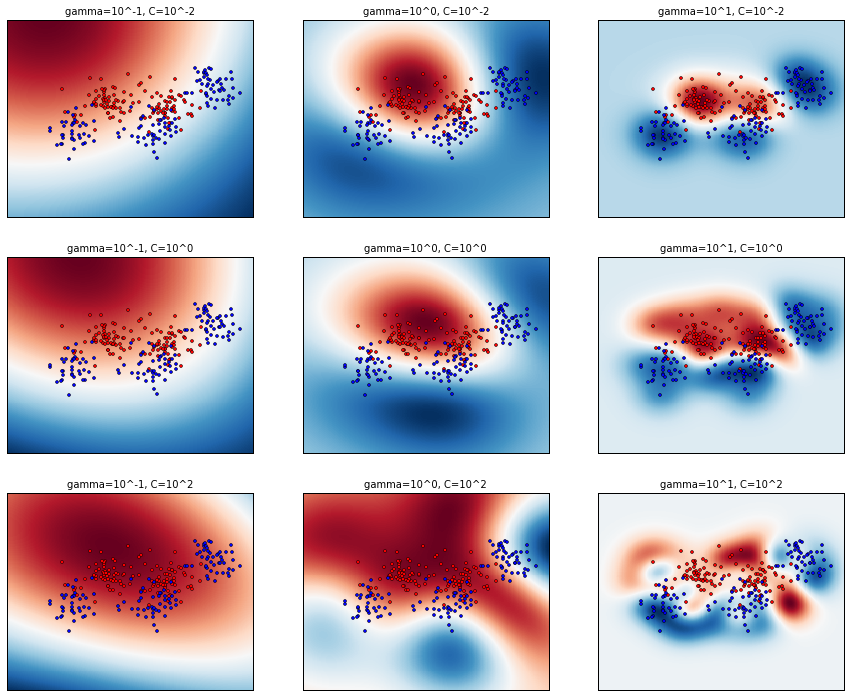

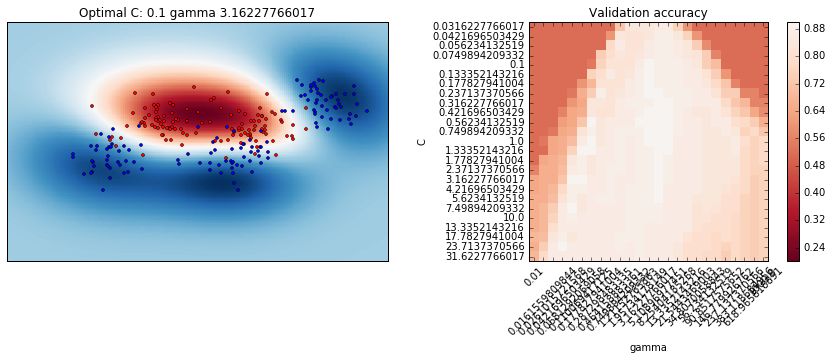

In [10]:
# Using this utility function to midpoint of the colormap to be around

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def postprobSVM(Xtr, ttr, Xte, tte, C_2d_range, gamma_2d_range):

    #scaler = StandardScaler()
    #Xtr = scaler.fit_transform(Xtr)
    
    classifiers = []
    for C in C_2d_range:
        for gamma in gamma_2d_range:
            clf = SVC(kernel = 'rbf', C=C, gamma=gamma)
            clf.fit(Xtr, ttr)
            classifiers.append((C, gamma, clf))

    plt.figure(figsize=(15, 12))
    xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200), np.linspace(-1, 2, 200))
    
    for (k, (C, gamma, clf)) in enumerate(classifiers):
        # evaluate decision function in a grid
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # visualize decision function for these parameters
        plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
        plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
                  size='medium')

        # visualize parameter's effect on decision function
        plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
        plot(Xtr[ttr == 1, 0], Xtr[ttr == 1, 1], 'ro', markersize=3)
        plot(Xtr[ttr == 0, 0], Xtr[ttr == 0, 1], 'bo', markersize=3)
        plt.xticks(())
        plt.yticks(())
        plt.axis('tight')
    
    # Gett optimal parameters for gamma and C
    C_range = logspace(-1.5, 1.5, 25)
    gamma_range = logspace(-2,3, 25)
    grid = optimalPara(Xtr, ttr, C_range, gamma_range)
    
    # Plotting the optimal parameter combination. 
    fig = figure(figsize = (15, 12))
    fig.subplots_adjust(hspace=.8)
    ax = fig.add_subplot(221)
    title('Optimal C: %s gamma %s' % (grid.best_params_['C'], grid.best_params_['gamma']))
    clf = SVC(kernel='rbf', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])
    clf.fit(Xtr, ttr)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    ax.plot(Xtr[ttr == 1, 0], Xtr[ttr == 1, 1], 'ro', markersize=3)
    ax.plot(Xtr[ttr == 0, 0], Xtr[ttr == 0, 1], 'bo', markersize=3)
    xticks(())
    yticks(())
    axis('tight')
    
    # Plotting C against gamma according to their grid scores (pridiction accuracy)
    scores = [x[1] for x in grid.grid_scores_]
    scores = np.array(scores).reshape(len(C_range), len(gamma_range))

    ax2 = fig.add_subplot(222)
    imshow(scores, interpolation='nearest',  cmap=plt.cm.RdBu,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    
    xlabel('gamma')
    ylabel('C')
    colorbar()
    xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    yticks(np.arange(len(C_range)), C_range)

    title('Validation accuracy')
    show()
    
# Call posterior probability SVM function
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
postprobSVM(Xtr, ttr, Xte, tte, C_2d_range, gamma_2d_range)

><h2>SVM Postirior Probabilities </h2> 
><font color = "black" size = "3">From the above diagrams show how the classification boundaries change when gamma (horizontally C stays fixed) and C (vertically gamma stays fixed). It can be seen that gamma has a much larger effect on how the decision boundaries are chaped, going from a sphereical shape at the right to a a much more irregular shape on the left as it makes the kernel more sensitve. C on the other side does more fine tuning by adjusting the penality of points that were missclassified. The bottom left diagram shows the SVM classifier with the optimal parameters and the test data.   </font>

## ROC curves

Use the score for the *test* data to generate an ROC curve for the SVM with linear and RBF kernels.  That is vary the decision threshold from large and negative to large and positive and find the true and false positive rates at each threshold. Plot the ROC curves on the same plot, together with the random allocation line. (Do this yourself, rather than using an sklearn utility!)

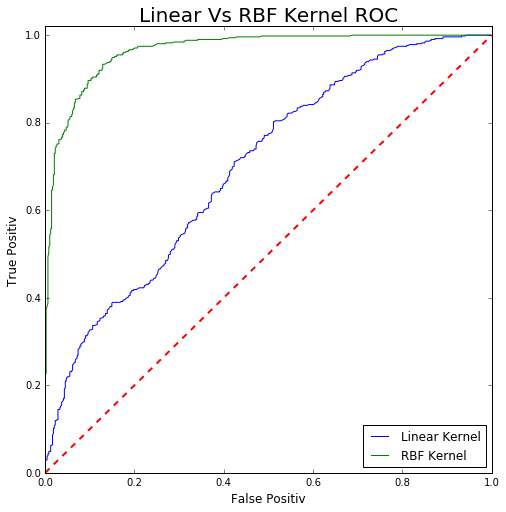

In [11]:
#Here I created a function that creates the true positve and flase positive rates for different thresholds. 
def rocCurve(Xtr, ttr, Xte, tte, C, gamma, kernel = 'linear'):
    
    #Getting the scores for each data point. The distance to the decision boundary
    svm = SVC(kernel=kernel, C = C, gamma = gamma)
    svm.fit(Xtr, ttr)
    scores = svm.decision_function(Xte)
    #Creating the accuracy rates. 
    t_scores = svm.decision_function(Xte[tte == 1])
    tp_scores = svm.predict(Xte[tte == 1])
    f_scores = svm.decision_function(Xte[tte == 0])
    fp_scores = svm.predict(Xte[tte == 0])
    #Creating a arbitrary range for the thresholds by taking the larges and the smalles score. 
    min_distance = min(scores)
    max_distance = max(scores)
 
    thresh = list(linspace(min_distance, max_distance, len(scores)))
    #thresh.reverse()
 

    roc = empty((len(thresh), 2), dtype =float)
    #Comparing the scores of the true positves and false positives with the threshold to generate the rates.
    for n, t in enumerate(thresh):
        tp = 0 
        fp = 0
        for i, s in enumerate(t_scores): 
            if s > t : 
                tp += 1
        for i, s in enumerate(f_scores): 
            if s > t :
                fp +=1
        
        tp_rate = tp/len(t_scores)
        fp_rate = fp/len(f_scores)
    
        roc[n, 0] = tp_rate
        roc[n, 1] = fp_rate
    
    return roc

lin_roc = rocCurve(Xtr, ttr, Xte, tte, grid.best_params_['C'], grid.best_params_['gamma'], kernel = 'linear')
rbf_roc = rocCurve(Xtr, ttr, Xte, tte, grid.best_params_['C'], grid.best_params_['gamma'], kernel = 'rbf')

fig = figure()
title('Linear Vs RBF Kernel ROC', fontsize = 20)
ax = fig.add_subplot(111)
ax.plot(lin_roc[:, 1],lin_roc[:, 0], label='Linear Kernel')
ax.plot(rbf_roc[:, 1],rbf_roc[:, 0], label='RBF Kernel')
xlabel('False Positiv', size = 12)
ylabel('True Positiv', size = 12)
x = [0.0, 1.0]
plt.plot(x, x, linestyle='dashed', color='red', linewidth=2)
ax.set_ylim(0,1.02)
legend(loc=4)

><h2>ROC Linear Vs Rbf </h2> 
><font color = "black" size = "3">As expected the ROC curve of the radial basis kernel depicts much more accurate results. </font>

If it is desired to achieve a true positive rate of 95%  for these data, what false positive rate must be tolerated?  What are the true and false negative rates in this case?

In [16]:
y = where(lin_roc > 0.95)[0]
y = where(rbf_roc > 0.95)[0]
print('With a linear kernel:')
print('In order to achieve a true positive rate of %0.2f%%, a false positive rate of %0.2f%% has to be tolerated.' % (lin_roc[y][len(y)-1][0]*100, lin_roc[y][len(y)-1][1]*100))
print('With a rbf kernel:')
print('In order to achieve a true positive rate of %0.2f%%, a false positive rate of %0.2f%% has to be tolerated.' % (rbf_roc[y][len(y)-1][0]*100, rbf_roc[y][len(y)-1][1]*100))

With a linear kernel:
In order to achieve a true positive rate of 89.43%, a false positive rate of 65.03% has to be tolerated.
With a rbf kernel:
In order to achieve a true positive rate of 95.11%, a false positive rate of 15.54% has to be tolerated.


Use the sklearn function <code>sklearn.metrics.roc_auc_score</code> (or your own function) to find the area under the ROC curves.  

In [19]:
svm = SVC(kernel='linear', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])
svm.fit(Xtr, ttr)
scores = svm.decision_function(Xte)
fpr, tpr, _ = roc_curve(tte, scores)
lin_auc = auc(fpr, tpr)
svm = SVC(kernel='rbf', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])
svm.fit(Xtr, ttr)
scores = svm.decision_function(Xte)
fpr2, tpr2, _ = roc_curve(tte, scores)
rbf_auc = auc(fpr2, tpr2)
print('Area underneath the curve of linear kernel:\n%0.2f\nArea underneath the curve of radial basis kernel:\n%0.2f' %(lin_auc, rbf_auc))


Area underneath the curve of linear kernel:
0.70
Area underneath the curve of radial basis kernel:
0.97


## Feature selection

 The aim of this exercise is to write and test a feature
  selector.  Write a function to do feature selection.   
  
There are a couple of choices to be made:
* What feature selection method to use.  For example, forward, backward, forward-backward are straightforward, but you could also use a single multi-objective evolutionary algorithm like that outlined in lectures to optimise ROC curves. 
* How to evaluate the quality of the classifier?  Obvious choices are the accuracy or the AUC.

Please specifiy in your notebook what decisions you have made about each of these.

To simplify the code, your function should take as an
  argument another that actually evaluates the
  classification with a given feature set; clearly you will have to write the evaluation function and it probably should do some cross validation as part of the evaluation (note that as feature selection is all part of the training, the evaluation should only use the training data.   You should think about how the $C$ and $\gamma$ parameters will be chosen here.  I'll be happy to discuss this.

In [39]:
from sklearn.cross_validation import StratifiedShuffleSplit
import operator

def featureSelection(Xtr, ttr):
    
    feat = Xtr.shape[1]
    feat_set = arange(1, feat+1)
    perf = []
    
    #Optimise parameters for data set. 
    C_range = logspace(-2, 0, 20)
    gamma_range = logspace(-3, 4, 20)
    grid = optimalPara(Xtr, ttr, C_range, gamma_range)
    
    #Creating all possible combinations without breaking sequence (limited)
    for i in feat_set:
        for n in range(0, i):
            perf.append([performance(Xtr[:,n:i], ttr, grid),(n,i)])
       
    index, value = max(enumerate(perf), key=operator.itemgetter(1))
    return value
    
def performance(Xtrain, ttrain, grid): 
    cv = StratifiedShuffleSplit(ttrain, 3, test_size=0.5, random_state=0)
    svm = SVC(kernel='rbf', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])
    selection = []
    #Performing a Stratified Kfold crossvalidation and getting the area under the curve. 
    for train_index, test_index in cv:
        svm.fit(Xtrain[train_index], ttrain[train_index,])
        y_scores = svm.decision_function(Xtrain[test_index])
        fpr, tpr, _ = roc_curve(ttrain[test_index], y_scores)
        roc_auc = auc(fpr, tpr)
        selection.append(roc_auc)
    
    #Taking the mean from the kfold cross validation of the area underneath the curve. 
    perf = mean(selection)
    
    return perf


featureSelection(Xtr, ttr)

[0.94362643617766562, (0, 2)]

><h2>Feature Selection </h2> 
><font color = "black" size = "3">In this function created a derivative of the forward-backward method. I do that by chosing an index and try combinations on the left of that index by staring at index one and move towards the chosen index. This method does not allow from combinations of features that lie apart. For example, I cannot chose the feature set (1, 3), only (1, 2, 3), (1) or (3). This puts significant limitations on the model, however, compromises the computational cost it requires, by running relatively fast. </font>

To test your feature selector construct a synthetic data set
    from the GMM5 data by appending some `fake' features to the two
    real features.  I suggest that you make the three new features from:
    (1) random Gaussian noise; (2) the sum of the two real features;
    and (3) the first feature degraded by adding some noise.  Thus you
    could make a fake 5-dimensional training data set using the following and similarly for soem test data.

In [40]:
N = Xtr.shape[0]
faketr = vstack((Xtr[:,0], Xtr[:,1], randn(N), sum(Xtr, axis=1), Xtr[:,0]+0.3*randn(N))).T
faketr.shape

(250, 5)

In [65]:
# Creating new data set with 7 dimensions. 
x = c_[Xtr, faketr]
fet = featureSelection(x, ttr)
select = arange(fet[1][0],fet[1][1] )
print('Selected features: %s' % select)


Selected features: [1 2 3]


Since there are only (!) five features, there are $2^5-1 = 31$
    combinations of features and it would be feasible to test them
    all.  You should find that your feature selector does actually
    find the correct set (that is, just the first two `real' features).
    If it doesn't can you say why not?

><h2>It doesn´t! </h2> 
><font color = "black" size = "3"> Unfortunately, my feature selector includes also the 3rd feature in its selection. This maybe do some correlation between the random noise and the actual features.</font>

### Ionosphere features

The ionosphere data set  contains 351  radar
    measurements on the ionosphere with 34 features and two classes.
    There are now $2^{34}-1 = 17179869183$ feature combinations, so
    exhaustive search is impossible. Use your feature selector to
    decide on an optimal feature set for classifying these data.
    
You can get the data as follows:

In [54]:
try: 
    ionosphere = loadtxt('ionosphere.txt')
except FileNotFoundError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/ionosphere.txt')
    ionosphere = loadtxt('ionosphere.txt')

ionX = ionosphere[:,:33]
iont = ionosphere[:,-1]
print(ionX.shape, iont.shape)

(350, 33) (350,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(ionX, iont, test_size=.8,random_state=0)
features = featureSelection(X_train, y_train)
a = features[1][0]
b = features[1][1]

Plot the ROC curve and find the AUC for classification with your selected features.

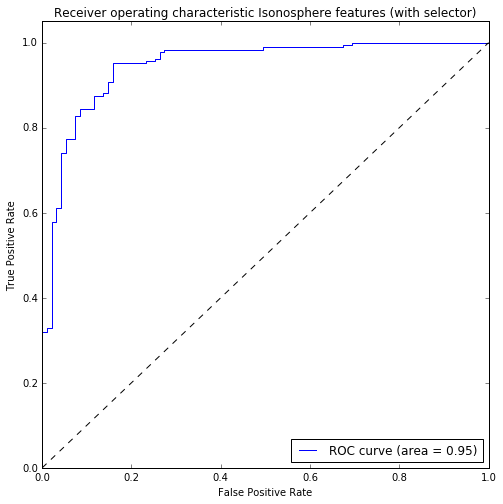

In [67]:
C_range = logspace(-2, 0, 25)
gamma_range = logspace(-3, 6, 25)
grid = optimalPara(ionX,iont, C_range, gamma_range)


# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X_train[:, a:b].shape
X = np.c_[X_train[:, a:b], random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(ionX[:, a:b], iont, test_size=.5,
                                                    #random_state=0)

# Learn to predict each class against the other
svm = SVC(kernel='rbf', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])
svm.fit(X_train[:, a:b], y_train)
y_score = svm.decision_function(X_test[:, a:b])



fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Isonosphere features (with selector)', fontsize = 12)
plt.legend(loc="lower right")
plt.show()

><h2>Roc after feature selection </h2> 
><font color = "black" size = "3"> The feature selector produces a fairly good result, with a area underneath the curve of 95%. However, like mentioned above, the selector could be significantly improved by allowing it to pick distant feature combinations. </font>